In [4]:
import numpy as np
import pandas as pd
import json
from urllib.request import urlopen
import sqlite3
import string

import seaborn as sns
import matplotlib.pyplot as plt

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
from ast import literal_eval

In [5]:
def handle_nan(y) :
    try :
        return literal_eval(y)


    except Exception as e:
        y = y.replace("nan", "0")
        return literal_eval(y)

In [6]:
data_speakers = pd.read_csv('data/speaker_attribute.bz2',  compression='bz2')

In [7]:
data_speakers.columns
columns_eval = ['occupation','religion','nationality','ethnic_group','party','academic_degree','religion']

In [8]:
data_speakers[columns_eval] = data_speakers[columns_eval].applymap(handle_nan)

In [9]:
data_speakers.head(10)

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,id,label,candidacy,religion,climate,skeptic
0,['+1732-02-22T00:00:00Z'],"[Great Britain, United States of America]",['male'],[],"[politician, slaveholder, farmer, engineer, ca...",[independent politician],[],Q23,George Washington,"['1792 United States presidential election', '...",[Episcopal Church],0,0
1,['+1952-03-11T00:00:00Z'],[United Kingdom],['male'],[White British],"[novelist, science fiction writer, children's ...",[],[],Q42,Douglas Adams,[],[],0,0
2,['+1868-08-23T00:00:00Z'],[Belgium],['male'],[],"[bibliographer, lawyer, inventor, information ...",[],[],Q1868,Paul Otlet,[],[],0,0
3,['+1946-07-06T00:00:00Z'],[United States of America],['male'],[],"[autobiographer, painter, financier, politicia...",[Republican Party],[],Q207,George W. Bush,"['2000 United States presidential election', '...","[United Methodist Church, Episcopal Church, Me...",1,1
4,['+1599-06-06T00:00:00Z'],[Spain],['male'],[],[painter],[],[],Q297,Diego Velázquez,[],[],0,0
5,['+1915-11-25T00:00:00Z'],[Chile],['male'],[],"[politician, military officer]",[independent politician],[],Q368,Augusto Pinochet,[],[Catholicism],0,0
6,['+1821-04-09T00:00:00Z'],[France],['male'],[French],"[literary critic, poet, author, art critic, es...",[],[],Q501,Charles Baudelaire,[],[Catholicism],0,0
7,['+1473-02-19T00:00:00Z'],[Kingdom of Poland],['male'],[Poles],"[physician, mathematician, astronomer, jurist,...",[],[],Q619,Nicolaus Copernicus,[],[Catholicism],0,0
8,['+1945-11-12T00:00:00Z'],"[Canada, United States of America]",['male'],[],"[autobiographer, singer-songwriter, actor, gui...",[],[],Q633,Neil Young,[],[],0,0
9,['+1969-00-00T00:00:00Z'],[Germany],['male'],[],"[photographer, Wikimedian]",[],[],Q640,Harald Krichel,[],[],0,0


In [21]:
plot = data_speakers.religion.explode().value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Catholic Church'),
  Text(1, 0, 'Islam'),
  Text(2, 0, 'Lutheranism'),
  Text(3, 0, 'Catholicism'),
  Text(4, 0, 'Anglicanism'),
  Text(5, 0, 'Judaism'),
  Text(6, 0, 'Eastern Orthodoxy'),
  Text(7, 0, 'Buddhism'),
  Text(8, 0, 'Hinduism'),
  Text(9, 0, 'Protestantism'),
  Text(10, 0, 'Christianity'),
  Text(11, 0, 'Sunni Islam'),
  Text(12, 0, 'atheism'),
  Text(13, 0, 'evangelical church'),
  Text(14, 0, 'Baptists'),
  Text(15, 0, 'Presbyterianism'),
  Text(16, 0, 'Methodism'),
  Text(17, 0, 'Shia Islam'),
  Text(18, 0, 'Evangelical Church of Czech Brethren'),
  Text(19, 0, 'Candomblé'),
  Text(20, 0, 'The Church of Jesus Christ of Latter-day Saints'),
  Text(21, 0, 'Calvinism'),
  Text(22, 0, 'Confucianism'),
  Text(23, 0, 'Tibetan Buddhism'),
  Text(24, 0, 'Eastern Orthodox Church'),
  Text(25, 0, 'Episcopal Church'),
  Text(26, 0, 

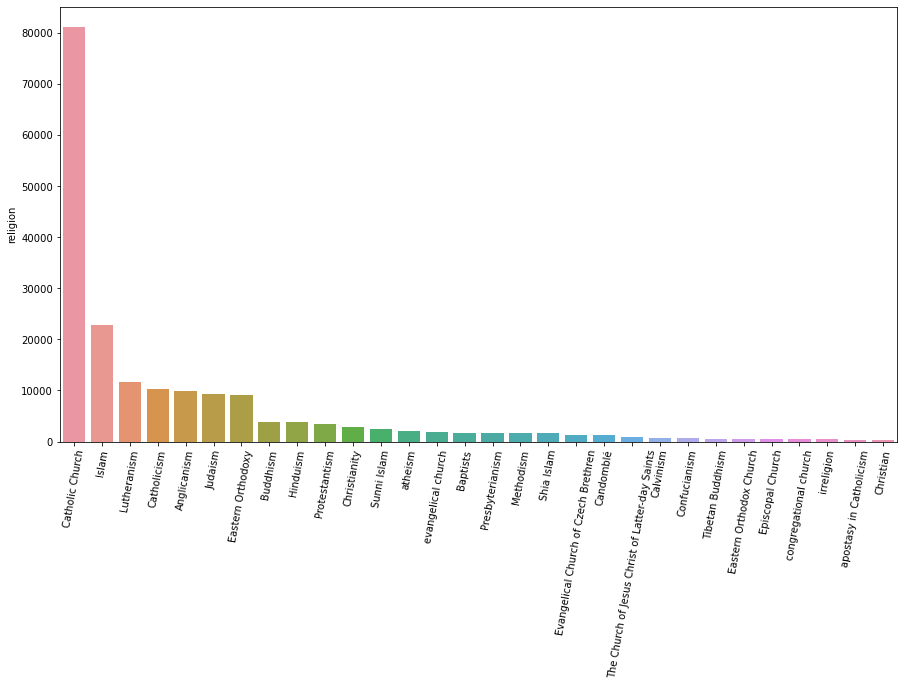

In [22]:
plot_h = plot.head(30)
plt.figure(figsize=(15, 8))
sns.barplot(x= plot_h.index, y = plot_h)
plt.xticks(rotation = 80)

In [83]:
#test and reference 

column_to_evaluate = [""]

test = data_speakers.occupation.head(10**5)
test.explode()

def remove_nan(y) :
    try :
        return literal_eval(y)


    except Exception as e:
        y = y.replace("nan", "0")
        return literal_eval(y)
    

def values_for_plot(x) : 
    return x.map(remove_nan).explode().value_counts()

test = data_speakers.occupation.head(10**5)

plot = values_for_plot(test)

plot = test.map(remove_nan).explode().value_counts()

test_2 = data_speakers.occupation.head((10**5))
test_2.tail()

test_2= test_2.map(remove_nan).explode()
test_2.tail()